# Project 4

For my project, I pulled down college scorecard data from the Data.gov API.  Specifically I pulled down data from schools only in region 1 (NEW ENGLAND). The fields I pulled and evaluated are listed below, and I created two clustering models using Kmeans.  

    id  
    school.name  
    school.state  
    2013.student.size  
    2013.aid.median_debt.completers.overall  
    2013.repayment.1_yr_repayment.completers  
    2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings  
    school.locale  
    school.religious_affiliation  




In my first model, I used the 4 variables below and imputed the median for all null values.  

    2013.student.size  
    2013.aid.median_debt.completers.overall  
    2013.repayment.1_yr_repayment.completers  
    2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings  



In my second model, I used only the most telling variables below.  I also removed the null values rather than imputing to see if the clusters would improve.

    2013.student.size  
    2013.aid.median_debt.completers.overall  
    2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings



As you scroll through, you will see EDA, modeling, conclusions and insights.

# Model 1

In [455]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [456]:
url0 = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?&_per_page=100&_page=0&school.region_id=1&_fields=id,school.name,school.state,2013.student.size,2013.aid.median_debt.completers.overall,2013.repayment.1_yr_repayment.completers,2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings,school.locale,school.religious_affiliation&api_key=FRtAZMChAYuil9bJasZP58cqvPjSID3jW4Fn03lK'
url1 = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?&_per_page=100&_page=1&school.region_id=1&_fields=id,school.name,school.state,2013.student.size,2013.aid.median_debt.completers.overall,2013.repayment.1_yr_repayment.completers,2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings,school.locale,school.religious_affiliation&api_key=FRtAZMChAYuil9bJasZP58cqvPjSID3jW4Fn03lK'
url2 = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?&_per_page=100&_page=2&school.region_id=1&_fields=id,school.name,school.state,2013.student.size,2013.aid.median_debt.completers.overall,2013.repayment.1_yr_repayment.completers,2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings,school.locale,school.religious_affiliation&api_key=FRtAZMChAYuil9bJasZP58cqvPjSID3jW4Fn03lK'
url3 = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?&_per_page=100&_page=3&school.region_id=1&_fields=id,school.name,school.state,2013.student.size,2013.aid.median_debt.completers.overall,2013.repayment.1_yr_repayment.completers,2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings,school.locale,school.religious_affiliation&api_key=FRtAZMChAYuil9bJasZP58cqvPjSID3jW4Fn03lK'
url4 = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?&_per_page=100&_page=4&school.region_id=1&_fields=id,school.name,school.state,2013.student.size,2013.aid.median_debt.completers.overall,2013.repayment.1_yr_repayment.completers,2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings,school.locale,school.religious_affiliation&api_key=FRtAZMChAYuil9bJasZP58cqvPjSID3jW4Fn03lK'




In [457]:
res0= requests.get(url0)
res1= requests.get(url1)
res2= requests.get(url2)
res3= requests.get(url3)
res4= requests.get(url4)

In [458]:
res0.content

b'{"metadata":{"total":427,"page":0,"per_page":100},"results":[{"2013.repayment.1_yr_repayment.completers":416,"2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings":37100,"school.name":"Connecticut Center for Massage Therapy-Groton","school.state":"CT","id":443483,"school.locale":22,"2013.student.size":157,"2013.aid.median_debt.completers.overall":7600.0,"school.religious_affiliation":null},{"2013.repayment.1_yr_repayment.completers":400,"2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings":25000,"school.name":"Paul Mitchell the School-Rhode Island","school.state":"RI","id":443641,"school.locale":21,"2013.student.size":188,"2013.aid.median_debt.completers.overall":10556.0,"school.religious_affiliation":null},{"2013.repayment.1_yr_repayment.completers":197,"2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings":25000,"school.name":"Empire Beauty School-Framingham","school.state":"MA","id":443678,"school.locale":13,"2013.student.size":94,"201

In [459]:
dic0 = json.loads(res0.content)
dic1 = json.loads(res1.content)
dic2 = json.loads(res2.content)
dic3 = json.loads(res3.content)
dic4 = json.loads(res4.content)

In [460]:
list(dic0.keys())

['metadata', 'results']

In [461]:
d0 = list(dic0.values())[1]
d1 = list(dic1.values())[1]
d2 = list(dic2.values())[1]
d3 = list(dic3.values())[1]
d4 = list(dic4.values())[1]



In [462]:
df0 = pd.DataFrame(d0)
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df3 = pd.DataFrame(d3)
df4 = pd.DataFrame(d4)

In [463]:
print(df0.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(100, 9)
(100, 9)
(100, 9)
(100, 9)
(27, 9)


In [464]:
df0.columns

Index(['2013.aid.median_debt.completers.overall',
       '2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings',
       '2013.repayment.1_yr_repayment.completers', '2013.student.size', 'id',
       'school.locale', 'school.name', 'school.religious_affiliation',
       'school.state'],
      dtype='object')

In [465]:
df0.columns = ['13Med.Debt', '13earnings10yrs', '13repay1yr', '13studentsize', 'id', 'locale', 'name', 'religious','state']
df1.columns = ['13Med.Debt', '13earnings10yrs', '13repay1yr', '13studentsize', 'id', 'locale', 'name', 'religious','state']
df2.columns = ['13Med.Debt', '13earnings10yrs', '13repay1yr', '13studentsize', 'id', 'locale', 'name', 'religious','state']
df3.columns = ['13Med.Debt', '13earnings10yrs', '13repay1yr', '13studentsize', 'id', 'locale', 'name', 'religious','state']
df4.columns = ['13Med.Debt', '13earnings10yrs', '13repay1yr', '13studentsize', 'id', 'locale', 'name', 'religious','state']

In [466]:
df0.columns

Index(['13Med.Debt', '13earnings10yrs', '13repay1yr', '13studentsize', 'id',
       'locale', 'name', 'religious', 'state'],
      dtype='object')

In [467]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
13Med.Debt         80 non-null float64
13earnings10yrs    75 non-null float64
13repay1yr         81 non-null float64
13studentsize      87 non-null float64
id                 100 non-null int64
locale             93 non-null float64
name               100 non-null object
religious          11 non-null float64
state              100 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 7.1+ KB


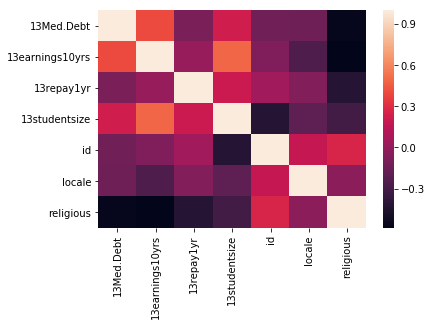

In [468]:
sns.heatmap(df0.corr())

In [469]:
frames = [df0, df1, df2, df3, df4]

In [470]:
df = pd.concat(frames,ignore_index=True)

In [471]:
df.drop(['religious','state'], axis=1, inplace=True)

In [472]:
df.shape

(427, 7)

In [473]:
df.tail()

,13Med.Debt,13earnings10yrs,13repay1yr,13studentsize,id,locale,name
422,9500.0,NaN,NaN,59.0,373711,22.0,Upper Cape Cod Regional Technical School
423,NaN,NaN,NaN,17.0,369792,31.0,Windham Memorial Hospital-Radiologic Technolog...
424,27000.0,53000.0,799.0,NaN,409616,21.0,Roger Williams University School of Law
425,7281.0,23200.0,210.0,176.0,373696,12.0,Rob Roy Academy-Worcester
426,17436.0,24500.0,983.0,196.0,425986,13.0,Mildred Elley-Pittsfield Campus


In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 7 columns):
13Med.Debt         351 non-null float64
13earnings10yrs    332 non-null float64
13repay1yr         362 non-null float64
13studentsize      369 non-null float64
id                 427 non-null int64
locale             403 non-null float64
name               427 non-null object
dtypes: float64(5), int64(1), object(1)
memory usage: 23.4+ KB


In [475]:
from sklearn.cluster import KMeans, k_means, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler

In [476]:
df.isnull().sum()

13Med.Debt         76
13earnings10yrs    95
13repay1yr         65
13studentsize      58
id                  0
locale             24
name                0
dtype: int64

In [477]:
selected_X = [col for col in df.columns if '13' in col]

In [478]:
X = df[selected_X]

Impute Median into null values

In [479]:
strategy = 'median'

t_imputer = Imputer(strategy=strategy)
t_imputer.fit(X)

df_Imp = t_imputer.transform(X)

print(X.mean())

13Med.Debt         17089.299145
13earnings10yrs    44499.397590
13repay1yr          1393.392265
13studentsize       2065.504065
dtype: float64


Standardize

In [480]:
ss = StandardScaler()
ss.fit(df_Imp)
df_imp_ss = ss.transform(df_Imp)

In [481]:
df_imp_ss

array([[-1.273918  , -0.33535203, -0.145659  , -0.57812631],
       [-0.87264602, -0.98076041, -0.14850612, -0.56772161],
       [-0.96210415, -0.98076041, -0.18462895, -0.59927135],
       ..., 
       [ 1.35959902,  0.51274658, -0.07750608, -0.39721876],
       [-1.31722171, -1.07677157, -0.18231567, -0.57174923],
       [ 0.06130228, -1.00743018, -0.0447642 , -0.56503652]])

In [482]:
df_imp_ss = pd.DataFrame(df_imp_ss, columns=X.columns, index=X.index)
df_imp_ss.shape

(427, 4)

In [483]:
df_imp_ss.drop([256, 363],inplace=True)

In [484]:
df.drop([256, 363],inplace=True)

In [485]:
df_imp_ss.shape

(425, 4)

In [486]:
df.shape

(425, 7)

In [487]:
df.to_csv('df')

In [488]:
df_imp_ss_name.to_csv('df_imp_ss_name')

Lets use KMeans to cluster

In [489]:
model = KMeans(n_clusters=6)
model.fit(df_imp_ss)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [490]:
df_imp_ss.shape

(425, 4)

In [491]:
predicted = model.labels_
centroids = model.cluster_centers_

In [492]:
print(predicted)
print(model.cluster_centers_)

[5 5 5 5 1 5 1 1 1 1 5 5 0 5 5 5 1 5 1 5 1 1 1 1 1 5 5 5 1 1 1 5 1 1 0 5 5
 2 4 0 0 0 4 4 0 3 3 1 1 5 5 1 5 1 5 5 1 1 5 5 5 0 5 2 1 1 4 4 0 0 1 0 0 1
 5 1 4 0 0 0 5 3 0 0 0 1 1 0 2 0 0 3 0 5 0 5 0 0 1 3 1 1 5 1 3 0 0 3 2 0 1
 1 1 1 5 4 2 0 0 3 0 0 0 1 0 3 1 5 0 5 1 5 5 5 2 1 0 5 0 0 0 0 5 0 2 0 5 0
 1 0 0 0 1 1 2 0 0 0 0 4 4 0 3 1 1 5 0 1 5 0 0 5 2 0 5 4 1 2 4 1 4 0 0 3 0
 0 5 3 3 0 0 0 0 0 3 3 2 4 4 1 0 5 0 0 1 0 1 0 1 1 3 5 4 0 5 0 3 0 1 1 1 5
 5 3 1 5 1 0 0 5 0 1 1 1 1 5 1 1 0 5 5 1 5 0 1 1 1 5 0 5 1 1 1 1 1 5 1 5 1
 1 1 0 1 1 5 1 1 1 3 5 1 1 5 1 5 5 1 5 5 5 2 5 1 2 3 4 4 0 0 0 4 4 4 1 3 5
 0 0 0 1 0 5 0 5 1 0 0 3 0 0 3 5 1 5 3 5 0 0 0 0 1 0 5 0 1 5 0 1 1 1 0 0 0
 5 3 0 5 1 0 1 0 5 3 1 0 1 5 5 5 3 2 2 0 5 1 0 0 5 1 5 5 0 5 5 1 1 1 1 1 5
 1 1 1 5 5 5 0 5 5 5 1 1 0 5 0 1 1 5 5 1 5 2 0 4 5 4 4 5 0 3 5 1 0 3 5 1 1
 5 0 1 5 1 0 0 1 1 1 1 1 5 5 1 0 5 1]
[[ 1.19233871  0.18945476  0.0166992   0.07676972]
 [-0.10688934 -0.20415331 -0.11505523 -0.41724761]
 [ 0.76401608  0.46907484  0.244874

In [493]:
df_imp_ss_name = pd.concat([df_imp_ss, df['name']], axis=1)

In [494]:
df_imp_ss_name.shape

(425, 5)

In [495]:
df_imp_ss_name['Predicted'] = predicted

In [496]:
df_imp_ss_name.shape

(425, 6)

In [497]:
df_imp_ss_name.head()

,13Med.Debt,13earnings10yrs,13repay1yr,13studentsize,name,Predicted
0,-1.273918,-0.335352,-0.145659,-0.578126,Connecticut Center for Massage Therapy-Groton,5
1,-0.872646,-0.980760,-0.148506,-0.567722,Paul Mitchell the School-Rhode Island,5
2,-0.962104,-0.980760,-0.184629,-0.599271,Empire Beauty School-Framingham,5
3,-1.189483,-0.820742,0.200266,-0.515027,The Salter School-Malden Campus,5
4,-0.065758,-0.207337,-0.157403,-0.613032,Advanced Welding Institute,1


In [498]:
df_imp_ss_name['Predicted'].value_counts()

1    129
0    118
5    110
3     29
4     23
2     16
Name: Predicted, dtype: int64

In [499]:
df_imp_ss_name[df_imp_ss_name.Predicted == 2]

,13Med.Debt,13earnings10yrs,13repay1yr,13studentsize,name,Predicted
37,0.714795,0.299388,0.089050,2.561744,Central Connecticut State University,2
63,-0.065758,0.416735,-0.206160,3.324979,University of Massachusetts-Boston,2
88,1.359599,1.526198,0.381414,4.893740,Boston University,2
108,1.359599,0.528748,0.431950,3.493468,University of New Hampshire-Main Campus,2
116,1.359599,-0.175333,0.630893,2.412386,Johnson & Wales University-Providence,2
134,0.465425,0.160706,0.000078,5.132712,Southern New Hampshire University,2
144,0.612983,0.539416,0.215391,2.715465,University of Vermont,2
154,0.553593,0.992802,0.633918,5.304558,University of Connecticut,2
172,1.237426,0.176708,0.171973,2.262022,University of Maine,2
177,1.495347,1.392849,0.322158,3.800910,Northeastern University,2


Lets plot

In [500]:
df_imp_ss_name.columns

Index(['13Med.Debt', '13earnings10yrs', '13repay1yr', '13studentsize', 'name',
       'Predicted'],
      dtype='object')

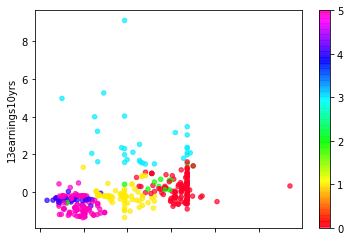

In [501]:
plt.figure(figsize=(7,7))
df_imp_ss_name.plot(x='13Med.Debt', y='13earnings10yrs', c=df_imp_ss_name['Predicted'], kind='scatter', cmap='gist_rainbow', alpha=.7)

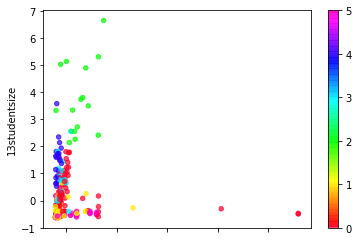

In [502]:
plt.figure(figsize=(7,7))
df_imp_ss_name.plot(x='13repay1yr', y='13studentsize', c=df_imp_ss_name['Predicted'], kind='scatter', cmap='gist_rainbow', alpha=.7)

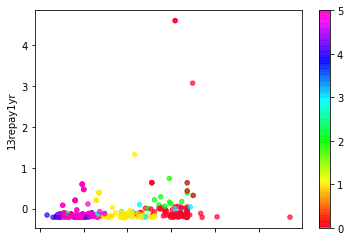

In [503]:
plt.figure(figsize=(7,7))
df_imp_ss_name.plot(x='13Med.Debt', y='13repay1yr', c=df_imp_ss_name['Predicted'], kind='scatter', cmap='gist_rainbow', alpha=.7)

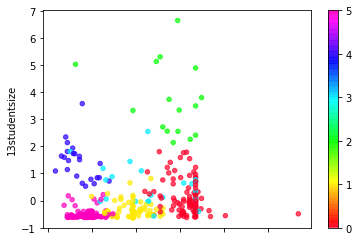

In [504]:
plt.figure(figsize=(7,7))
df_imp_ss_name.plot(x='13Med.Debt', y='13studentsize', c=df_imp_ss_name['Predicted'], kind='scatter', cmap='gist_rainbow', alpha=.7)

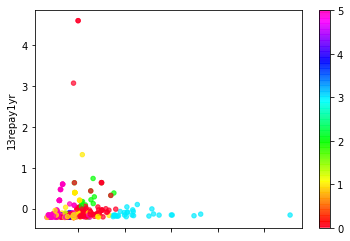

In [505]:
plt.figure(figsize=(7,7))
df_imp_ss_name.plot(x='13earnings10yrs', y='13repay1yr', c=df_imp_ss_name['Predicted'], kind='scatter', cmap='gist_rainbow', alpha=.7)

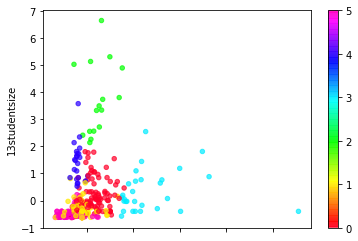

In [506]:
plt.figure(figsize=(7,7))
df_imp_ss_name.plot(x='13earnings10yrs', y='13studentsize', c=df_imp_ss_name['Predicted'], kind='scatter', cmap='gist_rainbow', alpha=.7)

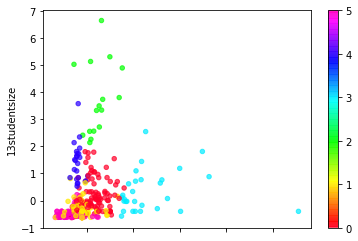

In [578]:
plt.figure(figsize=(7,7))
df_imp_ss_name.plot(x='13earnings10yrs', y='13studentsize', c=df_imp_ss_name['Predicted'], kind='scatter', cmap='gist_rainbow', alpha=.7)

In [625]:
from sklearn.metrics import silhouette_score

In [624]:
inertia = model.inertia_
sil_score = silhouette_score(df_imp_ss, predicted, metric='euclidean')

print('Inertia          = ', inertia)
print('Silhouette score = ', sil_score)

Inertia          =  378.311632999
Silhouette score =  0.392634551323


Using kmeans here- I would choose 5 or 6 clusters as the best solution. It is hard to visualize with multiple variables, but overall you can see certain variables that have nice seperation from each other graphically. Particularly, you can see a nice seperation between the below features:

    13Med.Debt and 13studentsize
    13Med.Debt and 13earnings10yrs
    13earnings10yrs and 13studentsize

Additionally, in this case of 6 clusters, I would describe the clusters as follows:

    0 = This group is almost exclusivley community colleges throughout the region.  An average debt of 7436.36, an avg 10 year earnings of 35995.65, and an average student size of	6105.
    
    1 = These seem to be much smaller, technical schools with a median class size of 171 students.  It includes mostly massage therapy schools, beauty schools, and other kinds of technical schools. An average debt of 8806.23, an avg 10 year earnings of 28775.82, and average student size of 340.
    
    2 =  This is the group that contains most of the imputed values.  To make this model better, I am going to remove the null rows instead of imputing because the values are not accurate.
    
    3 = These are top schools that have the highest 10 year earnings. Ivy leauge schools fall into this cluster. An average debt of 19839.08, avg 10 year earning of 94639.28, and average student size of 3175.
    
    4 = This group consists of larger schools, both state and private. An average debt of 22659.82, avg 10 year earning of	53766.66, and an average student size of 12421.
    
    5 = This last group contains a lot of smaller, liberal art schools, along with some smaller state schools and technical schools.  The average debt is 25809.33, the avg 10 year earnings is 47178.07, and the average student size is 2125.

In [663]:
df_pre_ss_predicted = df

In [664]:
df_pre_ss_predicted['Predicted'] = predicted

In [665]:
df_pre_ss_predicted.Predicted.value_counts()

1    129
0    118
5    110
3     29
4     23
2     16
Name: Predicted, dtype: int64

In [666]:
df_pre_ss_predicted[df_pre_ss_predicted.Predicted == 5]

,13Med.Debt,13earnings10yrs,13repay1yr,13studentsize,id,locale,name,Predicted
0,7600.0,37100.0,416.0,157.0,443483,22.0,Connecticut Center for Massage Therapy-Groton,5
1,10556.0,25000.0,400.0,188.0,443641,21.0,Paul Mitchell the School-Rhode Island,5
2,9897.0,25000.0,197.0,94.0,443678,13.0,Empire Beauty School-Framingham,5
3,8222.0,28000.0,2360.0,345.0,442815,21.0,The Salter School-Malden Campus,5
5,7281.0,23200.0,210.0,NaN,37369601,NaN,Rob Roy Academy - Woonsocket,5
10,8222.0,28000.0,2360.0,317.0,460589,22.0,Salter School-New Bedford,5
11,9586.5,23000.0,441.0,NaN,13012903,NaN,Marinello School of Beauty-Willimantic,5
13,9302.0,NaN,242.0,NaN,44599302,NaN,Marinello School of Beauty-Enfield,5
14,9307.5,NaN,49.0,50.0,461290,12.0,Laird Institute of Spa Therapy,5
15,8444.0,NaN,91.0,176.0,461704,32.0,Capilo School of Hair Design,5


# Model 2

I am going to run the same model, however I am going to remove the rows with null values instead of imputing to see if I can get more precise clusters.  I am also going to take out the column '13repay1yr' as this did not provide as much insight as the other 3 columns.

Remove rows with null values

In [553]:
df.columns

Index(['13Med.Debt', '13earnings10yrs', '13repay1yr', '13studentsize', 'id',
       'locale', 'name'],
      dtype='object')

In [554]:
X2 = df[['13Med.Debt', '13earnings10yrs','13studentsize', 'name']]

In [555]:
X2.isnull().sum()

13Med.Debt         76
13earnings10yrs    95
13studentsize      58
name                0
dtype: int64

In [556]:
X2.isnull().sum()

13Med.Debt         76
13earnings10yrs    95
13studentsize      58
name                0
dtype: int64

In [557]:
X2.dropna(inplace=True)

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [558]:
X2.isnull().sum()

13Med.Debt         0
13earnings10yrs    0
13studentsize      0
name               0
dtype: int64

In [559]:
X2.shape
#This removed a lot of our data unfortunately.  I will still run through the process to see what the results are.

(294, 4)

Standardize

In [636]:
X3 = X2[['13Med.Debt', '13earnings10yrs','13studentsize']]

In [561]:
ss = StandardScaler()
X3_ss = ss.fit_transform(X3)

In [562]:
X3_ss_df = pd.DataFrame(X3_ss, columns=X3.columns, index=X3.index)

In [563]:
X3_ss_df.shape

(294, 3)

Lets Model using KMeans

In [610]:
model2 = KMeans(n_clusters=5)
model2.fit(X3_ss_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [611]:
predicted2 = model2.labels_
centroids2 = model2.cluster_centers_

In [612]:
print(predicted2)
print(centroids2)

[0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 3 1 1 1 3 3 1 4 4 0 0 0 0 0 1 0 0 0 0 1 0 3
 3 1 1 1 1 1 0 0 3 1 1 1 0 1 1 1 1 1 2 1 1 4 1 0 1 1 1 1 4 1 1 0 0 4 1 1 2
 1 0 0 0 0 3 2 1 1 4 1 1 1 0 1 4 1 0 1 0 0 0 0 2 1 0 1 1 1 0 2 1 0 1 1 1 1
 2 1 1 4 1 3 3 1 4 0 0 1 0 1 1 0 2 1 3 4 2 3 3 1 1 4 1 1 0 4 4 1 1 1 1 1 4
 4 2 3 3 1 0 1 1 1 1 1 1 1 4 0 3 1 0 1 4 1 1 0 0 4 1 1 0 1 1 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 2 0 2 3 3 1 1 1 3 3 3 0 1 1 1 1 0 1 0 0 1 1 4 1 1 4 0 0 0
 4 0 1 1 1 1 1 0 1 0 0 1 3 0 1 1 0 4 1 0 1 1 4 1 1 0 0 0 4 2 2 3 0 4 4 0 1
 0 0 0 0 0 1 0 1 0 0 0 2 1 3 0 3 3 0 1 0 0 1 4 0 1 0 1 0 1 1 0 1 0 0 0]
[[-0.94406763 -0.68774736 -0.60427701]
 [ 0.88562285  0.09049946 -0.15816108]
 [ 0.66178324  0.45615343  3.14591533]
 [-1.13104224 -0.39152002  1.0677646 ]
 [ 0.28150851  2.34592561  0.31169545]]


In [613]:
len(predicted2)

294

Add names columns and predicted columns to df

In [614]:
X3_ss_df_name = pd.concat([X3_ss_df, X2.name], axis=1)

In [615]:
X3_ss_df_name['predicted'] = predicted2

In [616]:
X3_ss_df_name.head()

,13Med.Debt,13earnings10yrs,13studentsize,name,predicted
0,-1.218608,-0.358187,-0.698336,Connecticut Center for Massage Therapy-Groton,0
1,-0.858141,-1.008727,-0.689061,Paul Mitchell the School-Rhode Island,0
2,-0.938502,-1.008727,-0.717185,Empire Beauty School-Framingham,0
3,-1.142759,-0.847436,-0.642088,The Salter School-Malden Campus,0
10,-1.142759,-0.847436,-0.650465,Salter School-New Bedford,0


In [617]:
X3_ss_df_name.predicted.value_counts()

1    123
0    104
4     27
3     25
2     15
Name: predicted, dtype: int64

In [623]:
X3_ss_df_name[X3_ss_df_name.predicted == 2]

,13Med.Debt,13earnings10yrs,13studentsize,name,predicted
37,0.567874,0.281601,2.100615,Central Connecticut State University,2
88,1.147109,1.518165,4.179408,Boston University,2
108,1.147109,0.512784,2.931175,University of New Hampshire-Main Campus,2
116,1.147109,-0.196896,1.967474,Johnson & Wales University-Providence,2
134,0.343863,0.141815,4.392433,Southern New Hampshire University,2
144,0.476416,0.523537,2.237645,University of Vermont,2
154,0.423065,0.980528,4.545620,University of Connecticut,2
172,1.037359,0.157944,1.833435,University of Maine,2
177,1.269053,1.383756,3.205235,Northeastern University,2
196,0.786764,0.104181,2.093733,Bridgewater State University,2


In [619]:
inertia = model2.inertia_
sil_score = silhouette_score(X3_ss_df, predicted2, metric='euclidean')

print('Inertia          = ', inertia)
print('Silhouette score = ', sil_score)

Inertia          =  225.772101452
Silhouette score =  0.471714924365


By removing the nulls and removing the column '13repay1year' I was able to reduce inertia by 153 and increase the silhouette score by about 8%.  These clusters look a little bit clearner, but the downside is that we lost a good chunk of data.  In this case I would still recommend going with this second model as the data is 100% accurate.

In [629]:
X3_ss_df_name.head()

,13Med.Debt,13earnings10yrs,13studentsize,name,predicted
0,-1.218608,-0.358187,-0.698336,Connecticut Center for Massage Therapy-Groton,0
1,-0.858141,-1.008727,-0.689061,Paul Mitchell the School-Rhode Island,0
2,-0.938502,-1.008727,-0.717185,Empire Beauty School-Framingham,0
3,-1.142759,-0.847436,-0.642088,The Salter School-Malden Campus,0
10,-1.142759,-0.847436,-0.650465,Salter School-New Bedford,0


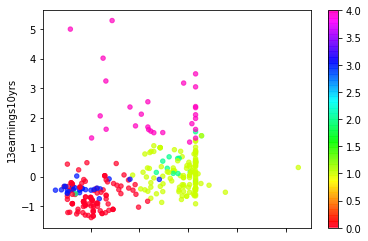

In [630]:
plt.figure(figsize=(7,7))
X3_ss_df_name.plot(x='13Med.Debt', y='13earnings10yrs', c=X3_ss_df_name['predicted'], kind='scatter', cmap='gist_rainbow', alpha=.7)

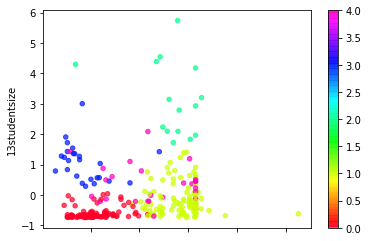

In [632]:
plt.figure(figsize=(7,7))
X3_ss_df_name.plot(x='13Med.Debt', y='13studentsize', c=X3_ss_df_name['predicted'], kind='scatter', cmap='gist_rainbow', alpha=.7)

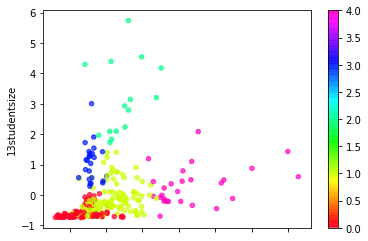

In [633]:
plt.figure(figsize=(7,7))
X3_ss_df_name.plot(x='13earnings10yrs', y='13studentsize', c=X3_ss_df_name['predicted'], kind='scatter', cmap='gist_rainbow', alpha=.7)

For this model using 5 clusters, I would describe the clusters as follows:

    0 = This group contains beauty schools, massage therapy schools, some smaller community colleges, and other smaller technical schools.  The average debt is 9851.36, average 10 year earnings is 30970.19, and average student size	471.  The median student size is 250, so most of these student sizes are very small.

    1 = This group contains a lot of mid-size, liberal arts schools, along with some smaller state schools and technical schools.  The average debt is 24855.69, the avg 10 year earnings is 45445.52, and the average student size is 1962.	

    2 = This group consists of larger schools, both state and private. An average debt of 23020.10, avg 10 year earning of 52246.66, and an average student size of 13005.

    3 = This group is almost exclusivley community colleges throughout the region.  An average debt of 8318.08, an avg 10 year earnings of 36480.00, and an average student size of 6059.

    4 = These are the schools that have the highest average 10 year earnings. Most are mid-size. Ivy league schools fall into this bucket.  The average student debt is 19901.66, average 10 year earnings is 87396.29, and the average student size is 3532.


In [640]:
X2['predicted'] = predicted2

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [646]:
X2.predicted.value_counts()

1    123
0    104
4     27
3     25
2     15
Name: predicted, dtype: int64

In [662]:
X2[X2.predicted == 4 ]

,13Med.Debt,13earnings10yrs,13studentsize,name,predicted
45,11486.0,118400.0,5422.0,Yale University,4
46,21500.0,71500.0,2239.0,Trinity College,4
91,19000.0,90900.0,9465.0,Boston College,4
99,19000.0,75000.0,1789.0,Bowdoin College,4
104,16925.0,75700.0,1791.0,Bates College,4
119,16000.0,87600.0,6182.0,Brown University,4
125,19500.0,72400.0,2466.0,Middlebury College,4
157,26000.0,65500.0,6486.0,Quinnipiac University,4
162,26385.0,77100.0,3721.0,Fairfield University,4
176,9561.0,68100.0,2347.0,Wellesley College,4
